<a href="https://colab.research.google.com/github/YeTian08/NYU-Integrated-Marketing/blob/main/%E2%80%9CBANK_Predicting_Customer_Churn_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np

In [83]:
pip install pingouin

In [84]:
df = pd.read_csv('https://raw.githubusercontent.com/YeTian08/NYU-Integrated-Marketing/main/bank.csv')
df=df.dropna()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [85]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

# Correlation


In [86]:
# install the software
import pingouin as pg

### The pairwise correlation 
https://pingouin-stats.org/generated/pingouin.pairwise_corr.html#pingouin.pairwise_corr

In [87]:
pg.pairwise_corr(df,columns=['balance', 'duration'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,balance,duration,pearson,two-sided,11162,0.022,"[0.0, 0.04]",0.001,0.0,0.022,0.018,0.197,0.659


In [88]:
pg.pairwise_corr(df,columns=['balance', 'duration','campaign'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,balance,duration,pearson,two-sided,11162,0.022,"[0.0, 0.04]",0.001,0.000,0.022,0.018,0.197,0.659
1,balance,campaign,pearson,two-sided,11162,-0.014,"[-0.03, 0.0]",0.000,0.000,-0.014,0.142,0.035,0.312
2,duration,campaign,pearson,two-sided,11162,-0.042,"[-0.06, -0.02]",0.002,0.002,-0.042,0.000,182.915,0.993


### The Partial correlation
https://pingouin-stats.org/generated/pingouin.partial_corr.html#pingouin.partial_corr

In [89]:
# Partial correlation of total_day_calls and number_customer_service_calls controlling for account_length
x='balance'
y='duration'
control='campaign'
pg.partial_corr(data=df, x=x, y=y, covar=control,
                method='pearson').round(3)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,11162,0.022,"[0.0, 0.04]",0.0,0.0,0.021,0.172,0.638


# Regression

## Scatterplot
https://seaborn.pydata.org/generated/seaborn.scatterplot.html


In [90]:
#install the package
import seaborn as sns

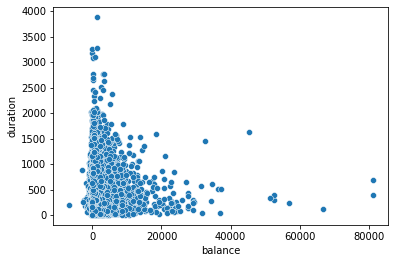

In [91]:
x='balance'
y='duration'
sns.scatterplot(data=df, x=x, y=y)

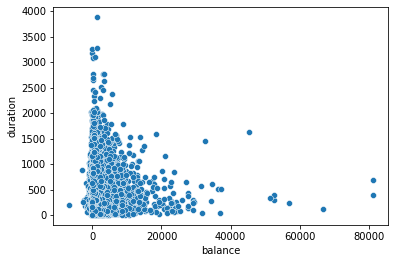

In [92]:
x='balance'
y='duration'
sns.scatterplot(data=df, x=x, y=y)

### Regression Result
https://www.statsmodels.org/stable/regression.html

In [93]:
import statsmodels.api as sm

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.5+ MB


In [95]:
# define the dependent and independent variables
X=df[['balance','duration']]
y=df['campaign']


In [96]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

,const,balance,duration
0,1.0,2343,1042
1,1.0,45,1467
2,1.0,1270,1389
3,1.0,2476,579
4,1.0,184,673


In [97]:
# conduct regression
model = sm.OLS(y, X).fit()

In [98]:
# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               campaign   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     10.59
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           2.53e-05
Time:                        12:45:43   Log-Likelihood:                -27005.
No. Observations:               11162   AIC:                         5.402e+04
Df Residuals:                   11159   BIC:                         5.404e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6455      0.039     67.024      0.0

### Check assumptions

In [99]:
### get the residuals
predictions = model.predict(X)
residuals =y-predictions
df_res=pd.DataFrame({'Residual': residuals, 'Prediction': predictions})
df_res.head()

,Residual,Prediction
0,-1.282694,2.282694
1,-1.170314,2.170314
2,-1.182148,2.182148
3,-1.431065,2.431065
4,-0.425731,2.425731


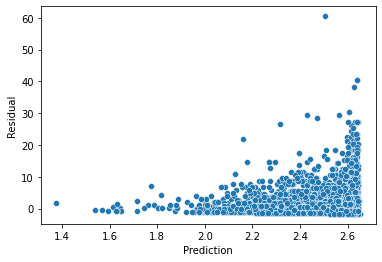

In [100]:
#print the scatter plot between residuals and predicitions
x='Prediction'
y='Residual'
sns.scatterplot(data=df_res, x=x, y=y)

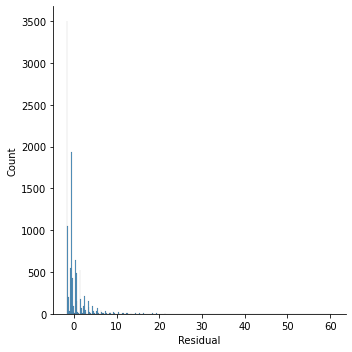

In [101]:
# histogram of the residual
sns.displot(df_res, x="Residual")

In [102]:
x=df_res['Residual']
pg.normality(x)

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
Residual,0.554765,0.0,False


In [103]:
pg.pairwise_corr(df,columns=['balance','duration'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,balance,duration,pearson,two-sided,11162,0.022,"[0.0, 0.04]",0.001,0.0,0.022,0.018,0.197,0.659


#Logit Analysis

In [104]:
df['Churn_Numeric'] = df['churn'].apply(lambda x: 1 if x =='yes' else 0)
df.head()

KeyError: ignored

In [ ]:
y=df['Churn_Numeric']
X=df[['total_intl_charge','number_customer_service_calls','account_length']]

In [ ]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

In [ ]:
# conduct regression
logit_model = sm.Logit(y, X).fit()

In [ ]:
# print model summary
print(logit_model.summary())

In [ ]:
### get the odds ratio
np.exp(logit_model.params)

In [ ]:
### get the predictions 
pred_prob = logit_model.predict(X)
df_result=pd.DataFrame({'Pred_prob': pred_prob,'y':y})
df_result['Prediction']=df_result['Pred_prob'].apply(lambda x: 1 if x >=0.5 else 0)
df_result.head()

In [ ]:
from sklearn.metrics import accuracy_score
Prediction = df_result['Prediction']
accuracy_score(y, Prediction)

# Cross Validation

In [ ]:
## get the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
# conduct regression
logit_model = sm.Logit(y_train, X_train).fit()

In [ ]:
# print model summary
print(logit_model.summary())

In [ ]:
### get the predictions on the test data
pred_prob = logit_model.predict(X_test)
df_test=pd.DataFrame({'Pred_prob': pred_prob,'y_test':y_test})
df_test['Prediction']=df_test['Pred_prob'].apply(lambda x: 1 if x >=0.5 else 0)
df_test.head()

In [ ]:
from sklearn.metrics import accuracy_score
Prediction =df_test['Prediction']
accuracy_score(y_test, Prediction)

### draw confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix
confmtrx = np.array(confusion_matrix(y_test, Prediction))
pd.DataFrame(confmtrx, index=['Non-Churn','Churn'],
columns=['predicted_Non_Churn', 'predicted_Churn'])

#Calculate the F1 score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, Prediction)

# Cross validation for multiple times

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
scores = cross_val_score(log_reg, X, y, cv=10)
print('Cross-Validation Accuracy Scores', scores)

In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

# Appendix

In [ ]:
Z =np.linspace(-100,100,10000)
P=np.exp(Z)/(1+np.exp(Z))
import plotly.express as px
fig = px.scatter(x=Z, y=P)
fig.show()